# 1)Getting Started

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import spacy

# 2. Load the tweets

In [3]:
import pandas as pd
df=pd.read_csv("C:\\Users\\kalpana\\Downloads\\Elon_musk (1).csv",error_bad_lines=False,sep='|', encoding='cp1252')

C:\Users\kalpana\AppData\Local\Temp\ipykernel_18140\553532601.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("C:\\Users\\kalpana\\Downloads\\Elon_musk (1).csv",error_bad_lines=False,sep='|', encoding='cp1252')


In [4]:
df

,",Text"
0,"1,@kunalb11 I’m an alien"
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with..."
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated"
4,"5,@teslacn Congratulations Tesla China for ama..."
...,...
2076,"1995,""@flcnhvy True, it sounds so surreal, but..."
2077,"1996,@PPathole Make sure to read ur terms &amp..."
2078,"1997,@TeslaGong @PPathole Samwise Gamgee"
2079,"1998,@PPathole Altho Dumb and Dumber is <U+000..."


In [5]:
!pip3 install snscrape

In [6]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy

# 3. Cleaning the tweets

In [7]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
df['cleanTweet'] = df[',Text'].apply(cleanTweets) #apply cleanTweet function to the tweet
df.head() #compares original tweets with cleaned Tweets

,",Text",cleanTweet
0,"1,@kunalb11 I’m an alien","1, I’m an alien"
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with...","2, Ray tracing on Cyberpunk with HDR is next-l..."
2,"3,@joerogan @Spotify Great interview!","3, Great interview!"
3,"4,@gtera27 Doge is underestimated","4, Doge is underestimated"
4,"5,@teslacn Congratulations Tesla China for ama...","5, Congratulations Tesla China for amazing exe..."


# 4. Detect sentiments

In [8]:
for row in df.itertuples():
    text = df.iloc[:, 1].tolist()
    tweets = " ".join(str(x) for x in text)
    text = TextBlob(tweets)
    score = text.sentiment

In [9]:
df[['polarity', 'subjectivity']] = df['cleanTweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [10]:
df.head(10)

,",Text",cleanTweet,polarity,subjectivity
0,"1,@kunalb11 I’m an alien","1, I’m an alien",-0.250000,0.750000
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with...","2, Ray tracing on Cyberpunk with HDR is next-l...",0.000000,0.000000
2,"3,@joerogan @Spotify Great interview!","3, Great interview!",1.000000,0.750000
3,"4,@gtera27 Doge is underestimated","4, Doge is underestimated",0.000000,0.000000
4,"5,@teslacn Congratulations Tesla China for ama...","5, Congratulations Tesla China for amazing exe...",0.345313,0.366667
5,"6,Happy New Year of the Ox! https://t.co/9WFKM...","6,Happy New Year of the Ox!",0.170455,0.454545
6,"7,""Frodo was the underdoge,","7,""Frodo was the underdoge,",0.000000,0.000000
7,"All thought he would fail,","All thought he would fail,",-0.500000,0.300000
8,"Himself most of all. https://t.co/zGxJFDzzrM""",Himself most of all.,0.500000,0.500000
9,"8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)","8, Haha thanks :)",0.300000,0.500000


In [11]:
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else('negative' if x<0  else 'neutral'))

In [12]:
df.head(10)

,",Text",cleanTweet,polarity,subjectivity,sentiment
0,"1,@kunalb11 I’m an alien","1, I’m an alien",-0.250000,0.750000,negative
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with...","2, Ray tracing on Cyberpunk with HDR is next-l...",0.000000,0.000000,neutral
2,"3,@joerogan @Spotify Great interview!","3, Great interview!",1.000000,0.750000,positive
3,"4,@gtera27 Doge is underestimated","4, Doge is underestimated",0.000000,0.000000,neutral
4,"5,@teslacn Congratulations Tesla China for ama...","5, Congratulations Tesla China for amazing exe...",0.345313,0.366667,positive
5,"6,Happy New Year of the Ox! https://t.co/9WFKM...","6,Happy New Year of the Ox!",0.170455,0.454545,positive
6,"7,""Frodo was the underdoge,","7,""Frodo was the underdoge,",0.000000,0.000000,neutral
7,"All thought he would fail,","All thought he would fail,",-0.500000,0.300000,negative
8,"Himself most of all. https://t.co/zGxJFDzzrM""",Himself most of all.,0.500000,0.500000,positive
9,"8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)","8, Haha thanks :)",0.300000,0.500000,positive


(-1.1246941209538313,
 1.101175910521611,
 -1.1263486466282222,
 1.1200283532965816)

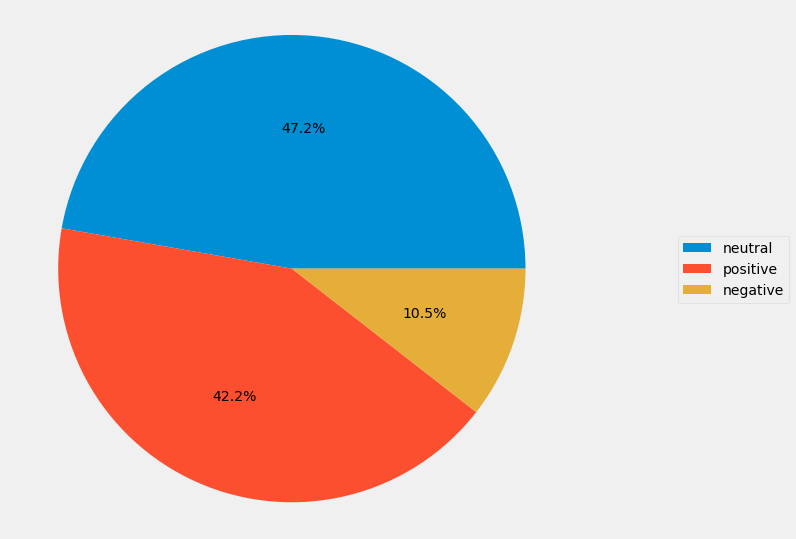

In [15]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df["sentiment"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")